# Introduction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score



import re
import nltk
import string

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Dataset

In [ ]:
pd.options.mode.chained_assignment = None

df = pd.read_csv('/content/drive/MyDrive/dataset.csv', encoding = 'utf8')

df["text"] = df["text"].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38657 entries, 0 to 38656
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      38657 non-null  object
 1   category  38657 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 604.1+ KB


In [ ]:
print(df.isnull().sum())

text        0
category    0
dtype: int64


In [ ]:
# Drop Null/NaN values
df.dropna(inplace=True)

 1    13041
-1    12849
 0    12768
Name: category, dtype: int64


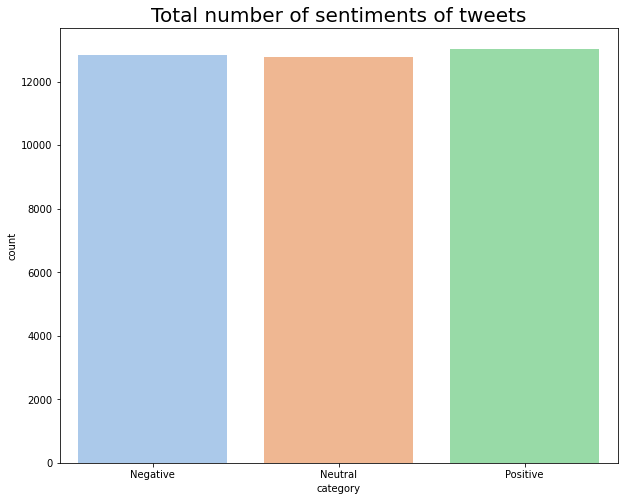

In [ ]:
print(df.category.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'category', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
plt.show()

#Text Preprocessing

## Lower Casing


In [ ]:
df["text_lower"] = df["text"].str.lower()
df[['text', 'text_lower']].head()

,text,text_lower
0,"when modi promised ""minimum government maximum...","when modi promised ""minimum government maximum..."
1,well said yes that the only perspective with w...,well said yes that the only perspective with w...
2,why are afraid modi wave,why are afraid modi wave
3,your answer bjpmodi vision national security l...,your answer bjpmodi vision national security l...
4,please listen live broadcast narendra modi,please listen live broadcast narendra modi


## Removal of Punctuations


In [ ]:
def remove_punctuation(text):
  """custom function to remove the punctuation"""
  return re.sub(r'[^\w\s]', '', text)
  
df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df[['text_lower', 'text_wo_punct']].head()

,text_lower,text_wo_punct
0,"when modi promised ""minimum government maximum...",when modi promised minimum government maximum ...
1,well said yes that the only perspective with w...,well said yes that the only perspective with w...
2,why are afraid modi wave,why are afraid modi wave
3,your answer bjpmodi vision national security l...,your answer bjpmodi vision national security l...
4,please listen live broadcast narendra modi,please listen live broadcast narendra modi


## Removal of stopwords

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
# df["text_wo_stop"] = df["text_wo_punct"]
df[['text_wo_punct', 'text_wo_stop']].head()

,text_wo_punct,text_wo_stop
0,when modi promised minimum government maximum ...,modi promised minimum government maximum gover...
1,well said yes that the only perspective with w...,well said yes perspective modi works however o...
2,why are afraid modi wave,afraid modi wave
3,your answer bjpmodi vision national security l...,answer bjpmodi vision national security land w...
4,please listen live broadcast narendra modi,please listen live broadcast narendra modi


## Removal of Frequent words



In [ ]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('modi', 35660),
 ('india', 7617),
 ('bjp', 3144),
 ('people', 2943),
 ('narendra', 2905),
 ('like', 2899),
 ('congress', 2690),
 ('nation', 2373),
 ('space', 2313),
 ('govt', 2164)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df[['text_wo_stop', 'text_wo_stopfreq']].head()

,text_wo_stop,text_wo_stopfreq
0,modi promised minimum government maximum gover...,promised minimum government maximum governance...
1,well said yes perspective modi works however o...,well said yes perspective works however opposi...
2,afraid modi wave,afraid wave
3,answer bjpmodi vision national security land w...,answer bjpmodi vision national security land w...
4,please listen live broadcast narendra modi,please listen live broadcast


## Removal of Rare words



In [ ]:

n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df[['text_wo_stopfreq', 'text_wo_stopfreqrare']].head()

,text_wo_stopfreq,text_wo_stopfreqrare
0,promised minimum government maximum governance...,promised minimum government maximum governance...
1,well said yes perspective works however opposi...,well said yes perspective works however opposi...
2,afraid wave,afraid wave
3,answer bjpmodi vision national security land w...,answer bjpmodi vision national security land w...
4,please listen live broadcast,please listen live broadcast


## Lemmatization


In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatizer"] = df["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df[['text_wo_stopfreqrare', 'text_lemmatizer']].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,text_wo_stopfreqrare,text_lemmatizer
0,promised minimum government maximum governance...,promise minimum government maximum governance ...
1,well said yes perspective works however opposi...,well say yes perspective work however oppositi...
2,afraid wave,afraid wave
3,answer bjpmodi vision national security land w...,answer bjpmodi vision national security land w...
4,please listen live broadcast,please listen live broadcast


In [ ]:
df['text'] = df['text_lemmatizer']

#Analysing the data

###Word-Cloud for Positive tweets

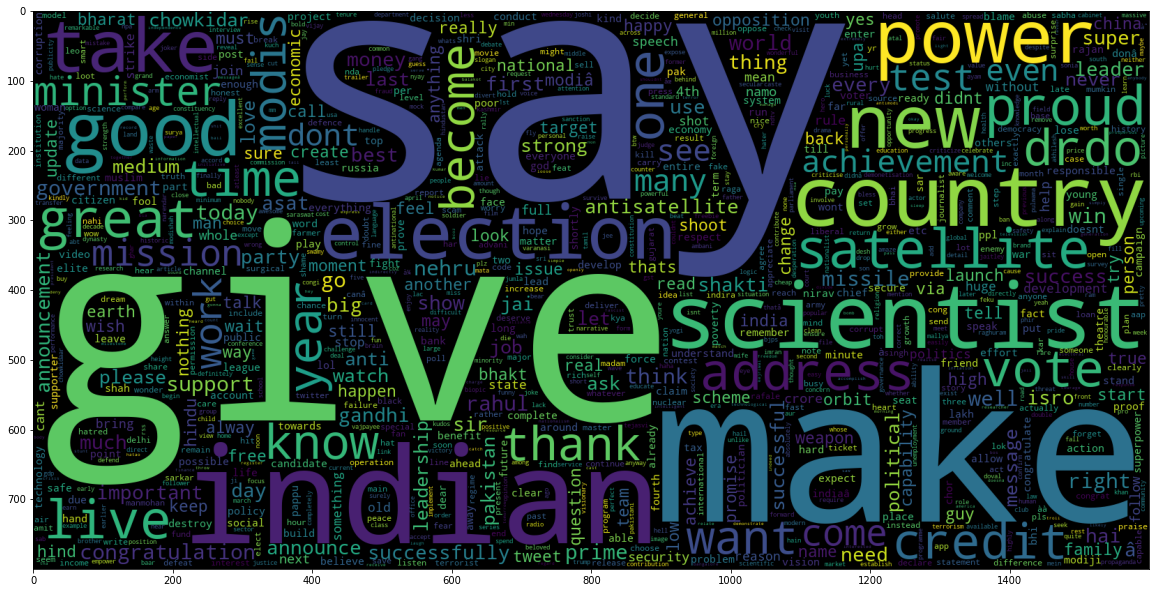

In [ ]:
data_pos = df[df.category == 1]['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

###Word-Cloud for Neutral tweets

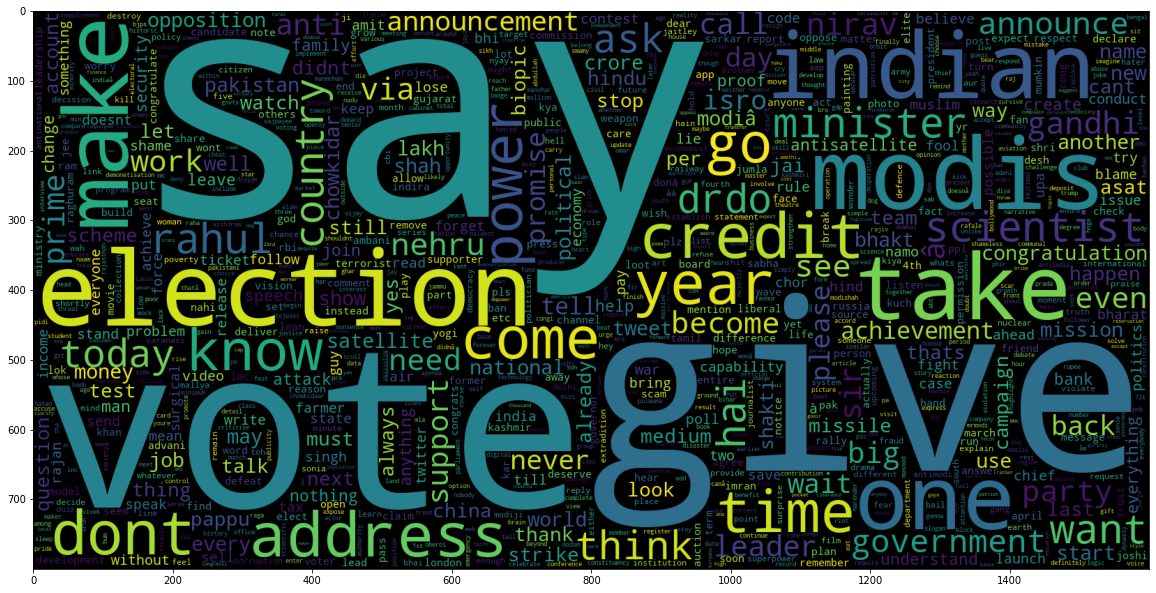

In [ ]:
data_neu = df[df.category == 0]['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neu))
plt.imshow(wc)

###Word-Cloud for Negative tweets

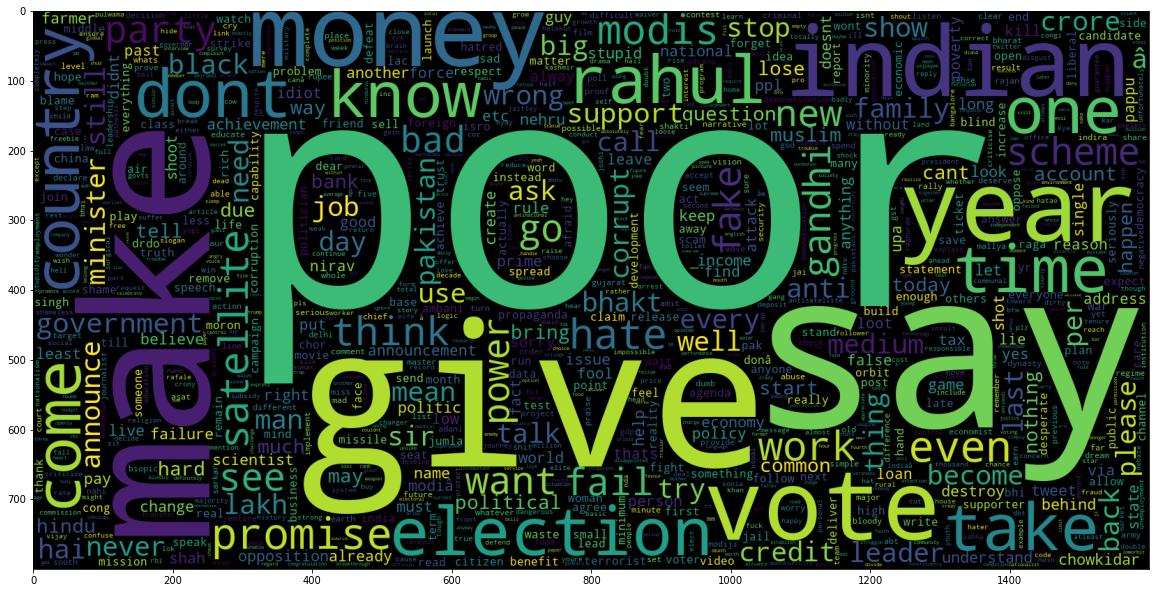

In [ ]:
data_neg = df[df.category == -1]['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

# Tranforming the dataset

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
all_features = vectorizer.fit_transform(df.text)
all_features.shape

(38658, 39016)

#Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(all_features, 
                                                    df.category, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify= df.category)

#Model

##NB

In [ ]:
classifier_nb = MultinomialNB()
t = time.time()
classifier_nb.fit(X_train, y_train)
time_for_train_nb = time.time()-t
print(f'Time Taken: {time_for_train_nb} seconds')

Time Taken: 0.03399467468261719 seconds


##KNN


In [ ]:
classifier_knn = KNeighborsClassifier(n_neighbors=7)

t = time.time()
classifier_knn.fit(X_train,y_train)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.013192176818847656 seconds


##SVM

In [ ]:
# svm rbf
classifier_svm_rbf = SVC(C = 1,kernel = 'rbf')

t = time.time()
classifier_svm_rbf.fit(X_train, y_train)
time_for_train_svm_rbf = time.time()-t
print(f'Time Taken: {time_for_train_svm_rbf} seconds')

Time Taken: 395.5478165149689 seconds


In [ ]:
# svm linear
classifier_svm_linear = SVC(C = 1,kernel = 'linear')

t = time.time()
classifier_svm_linear.fit(X_train, y_train)
time_for_train_svm_linear = time.time()-t
print(f'Time Taken: {time_for_train_svm_linear} seconds')

Time Taken: 272.6592037677765 seconds


##Decision Tree

In [ ]:
classifier_dtree = DecisionTreeClassifier(criterion = 'entropy')

t = time.time()
classifier_dtree.fit(X_train, y_train)
time_for_train_dtree = time.time()-t
print(f'Time Taken: {time_for_train_dtree} seconds')

Time Taken: 1.508948802947998 seconds


#Evalution

In [ ]:
# source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ['Negative', 'Neutral', 'Positive']

def model_Evaluate(model):

  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_predictions(
          y_test,
          y_pred,
          display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

          -1       0.82      0.12      0.21      3855
           0       0.38      0.98      0.55      3831
           1       0.87      0.26      0.40      3912

    accuracy                           0.45     11598
   macro avg       0.69      0.46      0.39     11598
weighted avg       0.69      0.45      0.39     11598



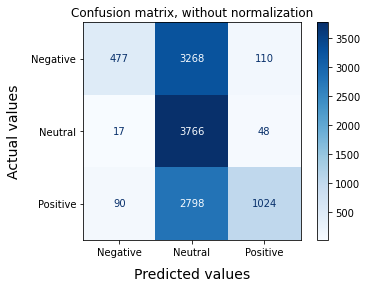

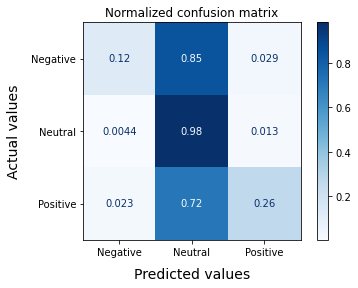

In [ ]:
model_Evaluate(classifier_knn)

              precision    recall  f1-score   support

          -1       0.60      0.81      0.69      3855
           0       0.82      0.44      0.57      3831
           1       0.66      0.73      0.69      3912

    accuracy                           0.66     11598
   macro avg       0.69      0.66      0.65     11598
weighted avg       0.69      0.66      0.65     11598



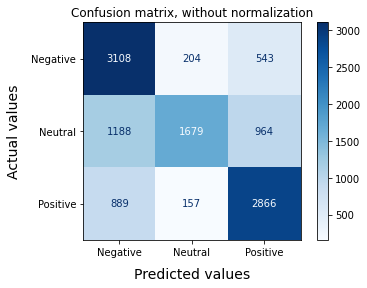

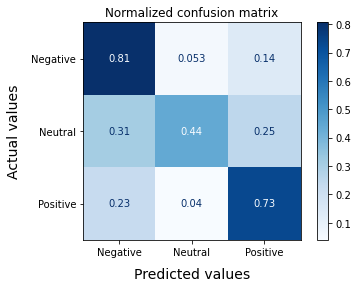

In [ ]:
model_Evaluate(classifier_nb)

              precision    recall  f1-score   support

          -1       0.77      0.80      0.78      3855
           0       0.78      0.87      0.82      3831
           1       0.88      0.73      0.80      3912

    accuracy                           0.80     11598
   macro avg       0.81      0.80      0.80     11598
weighted avg       0.81      0.80      0.80     11598



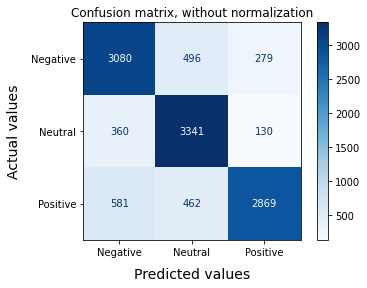

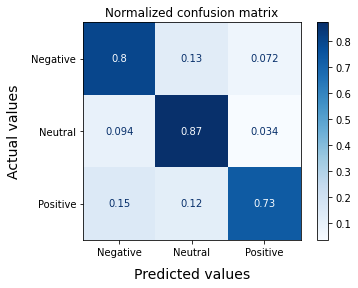

In [ ]:
model_Evaluate(classifier_svm_rbf)

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82      3855
           0       0.84      0.90      0.87      3831
           1       0.86      0.81      0.83      3912

    accuracy                           0.84     11598
   macro avg       0.84      0.84      0.84     11598
weighted avg       0.84      0.84      0.84     11598



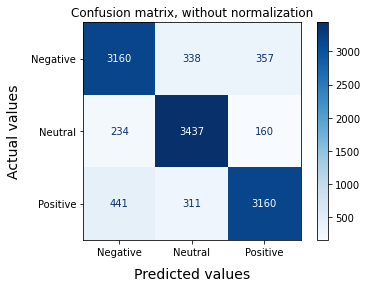

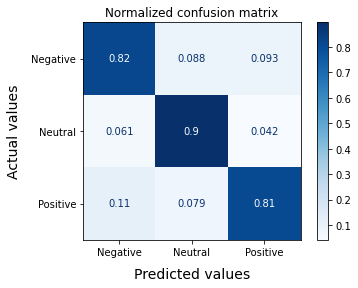

In [ ]:
model_Evaluate(classifier_svm_linear)

              precision    recall  f1-score   support

          -1       0.85      0.27      0.41      3855
           0       0.42      0.99      0.59      3831
           1       0.89      0.30      0.45      3912

    accuracy                           0.52     11598
   macro avg       0.72      0.52      0.49     11598
weighted avg       0.72      0.52      0.48     11598



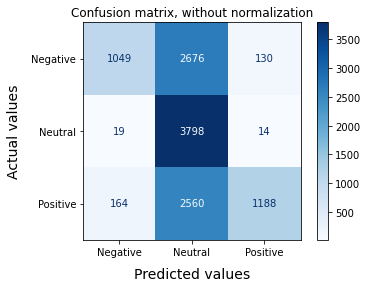

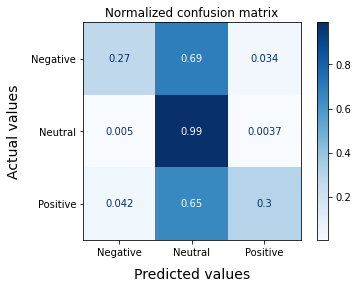

In [ ]:
model_Evaluate(classifier_dtree)

#Compare

In [ ]:
t = time.time()
y_pred = classifier_nb.predict(X_test)
time_for_predict_nb = time.time() - t
acc_nb = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_knn.predict(X_test)
time_for_predict_knn = time.time() - t
acc_knn = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_svm_rbf.predict(X_test)
time_for_predict_svm_rbf = time.time() - t
acc_svm_rbf = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_svm_linear.predict(X_test)
time_for_predict_svm_linear = time.time() - t
acc_svm_linear = accuracy_score(y_test, y_pred)

t = time.time()
y_pred = classifier_dtree.predict(X_test)
time_for_predict_dtree = time.time() - t
acc_dtree = accuracy_score(y_test, y_pred)


In [ ]:
print(f'KNN:           Train: {time_for_train_knn:.3f}s, Predict: {time_for_predict_knn:.3f}s, Accuracy: {acc_knn*100:.2f}%')
print(f'Naive Bayes:   Train: {time_for_train_nb:.3f}s, Predict: {time_for_predict_nb:.3f}s, Accuracy: {acc_nb*100:.2f}%')
print(f'SVM rbf:       Train: {time_for_train_svm_rbf:.3f}s, Predict: {time_for_predict_svm_rbf:.3f}s, Accuracy: {acc_svm_rbf*100:.2f}%')
print(f'SVM linear:    Train: {time_for_train_svm_linear:.3f}s, Predict: {time_for_predict_svm_linear:.3f}s, Accuracy: {acc_svm_linear*100:.2f}%')
print(f'Decision Tree: Train: {time_for_train_dtree:.3f}s, Predict: {time_for_predict_dtree:.3f}s, Accuracy: {acc_dtree*100:.2f}%')

KNN:           Train: 0.009s, Predict: 8.984s, Accuracy: 45.41%
Naive Bayes:   Train: 0.021s, Predict: 0.005s, Accuracy: 65.21%
SVM rbf:       Train: 395.548s, Predict: 41.813s, Accuracy: 80.10%
SVM linear:    Train: 272.659s, Predict: 18.866s, Accuracy: 84.13%
Decision Tree: Train: 12.064s, Predict: 0.013s, Accuracy: 78.98%


#Tuning parameters using GridsearchCV 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
param_grid = {
    'n_neighbors': [5,7],
    'weights': ['uniform', 'distance'],
    # 'p': [1,2]
}

In [ ]:
grid = GridSearchCV(classifier_knn,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.447 total time=   3.5s
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.458 total time=   2.9s
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.465 total time=   2.9s
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.464 total time=   2.9s
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.459 total time=   2.8s
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.455 total time=   2.8s
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.472 total time=   3.0s
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.476 total time=   2.8s
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.473 total time=   2.8s
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.468 total time=   2.7s
[CV 1/5] END ....n_neighbors=7, weights=uniform;, score=0.436 total time=   2.9s
[CV 2/5] END ....n_neighbors=7, weights=uniform;,

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [5, 7],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
print(grid.best_estimator_)
print(grid.best_params_)

KNeighborsClassifier(weights='distance')
{'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 648 3073  134]
 [  21 3748   62]
 [ 101 2639 1172]]
              precision    recall  f1-score   support

          -1       0.84      0.17      0.28      3855
           0       0.40      0.98      0.56      3831
           1       0.86      0.30      0.44      3912

    accuracy                           0.48     11598
   macro avg       0.70      0.48      0.43     11598
weighted avg       0.70      0.48      0.43     11598



              precision    recall  f1-score   support

          -1       0.79      0.15      0.26      3855
           0       0.39      0.98      0.56      3831
           1       0.86      0.27      0.41      3912

    accuracy                           0.47     11598
   macro avg       0.68      0.47      0.41     11598
weighted avg       0.68      0.47      0.41     11598



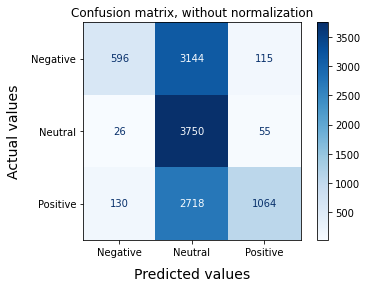

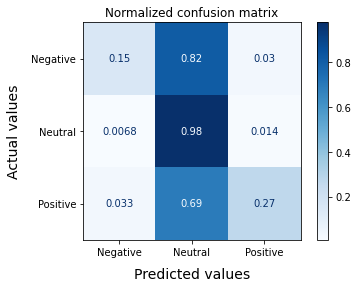

In [ ]:
model_Evaluate(grid)

#RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 

In [ ]:
tree_cv = RandomizedSearchCV(classifier_dtree, param_dist, cv = 5)

In [ ]:
tree_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27bec6b0a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f27bec6b430>})

In [ ]:
print(tree_cv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_features=2)
